# Data Understanding

## Data Loading

In [310]:
# Import semua library yang digunakan
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from scipy.stats import kendalltau, chi2_contingency
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import xgboost 

%matplotlib inline
warnings.filterwarnings("ignore")

In [354]:
# Membaca file dengan format csv
df = pd.read_csv('BankChurners.csv')

print(df.shape)
df.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Output kode di atas memberikan informasi sebagai berikut:
- Ada 10127 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 23 kolom


## Exploratory Data Analysis

### Exploratory Data Analysis - Deskripsi Variabel

In [355]:
# Menghapus kolom yang tidak digunakan
df.drop(columns = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace = True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [356]:
# Menampilkan kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Dari output terlihat bahwa:
- Terdapat 9 kolom dengan tipe object. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 10 kolom numerik dengan tipe data float64. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom kategorik dengan tipe data object, yaitu: Attrition_Flag. Kolom ini yang akan menjadi target fitur.

In [357]:
# Menampilkan statistika deskriptive pada kolom numerik
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Exploratory Data Analysis - Data Visualization

#### Univariate Analysis

In [358]:
# Dilakukan pemisahan kolom dengan tipe data kategorik dan numerik agar memudahkan saat proses EDA
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(exclude=['object']).columns.tolist()

# Menampilkan jumlah kolom kategorik dan nama kolomnya
print(f'jumlah kolom kategorik :{len(cat_col)}')
print(cat_col)

# Menampilkan jumlah kolom numerik dan nama kolomnya
print(f'jumlah kolom numerik :{len(num_col)}')
print(num_col)

jumlah kolom kategorik :6
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
jumlah kolom numerik :14
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


##### Numerical Feature

In [359]:
# Fungsi untuk menampilkan histogram dan boxplot pada kolom numerik serta menampilkan informasi statistik deskriptif
def data_dist(df,variables):
    norm_dist = []
    norm_dist_with_outlier =[]

    skew_dist = []
    skew_dist_with_outlier = []

    for variable in variables:
        plt.figure(figsize=(16, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[variable], bins=30)
        plt.title(f'{variable}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable])
        plt.title(f'{variable}')
        plt.show()

        if df[variable].skew() > -0.5 and df[variable].skew() < 0.5:
            upper_boundary = df[variable].mean() + 3 * df[variable].std()
            lower_boundary = df[variable].mean() - 3 * df[variable].std()
            outlier = len(df[df[variable] > upper_boundary]) + len(df[df[variable] < lower_boundary])

            print(f'Kolom {variable} berditribusi normal')
            print(f'Skewness  : {df[variable].skew()}')
            print(f'Jumlah Data : {len(df)}')
            print(f'Median: {df[variable].median()}')
            print(f'Mean: {df[variable].mean()}')
            print(f'Jumlah Outlier : {outlier}')
            print(f'% Persentase outlier : {(len(df[df[variable] > upper_boundary]) + len(df[df[variable] < lower_boundary])) / (len(df) * 100)}\n')
            norm_dist.append(variable)

            if outlier > 0:
                norm_dist_with_outlier.append(variable)

        else:
            iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)
            upper_boundary_skew = df[variable].quantile(0.75) + 1.5 * iqr
            lower_boundary_skew = df[variable].quantile(0.25) - 1.5 * iqr
            outlier = len(df[df[variable] > upper_boundary_skew]) + len(df[df[variable] < lower_boundary_skew])

            print(f'Kolom {variable} berditribusi skew')
            print(f'Skewness  : {df[variable].skew()}')
            print(f'Jumlah Data : {len(df)}')
            print(f'Median: {df[variable].median()}')
            print(f'Mean: {df[variable].mean()}')
            print(f'Jumlah Outlier : {outlier}')
            print(f'% Persentase outlier : {(len(df[df[variable]> upper_boundary_skew]) + len(df[df[variable]< lower_boundary_skew])) / (len(df) * 100)}\n')
            skew_dist.append(variable)

            if outlier > 0:
                skew_dist_with_outlier.append(variable)

    print(f'Variables berdistribusi normal :{norm_dist}')
    print(f'Variables berdistribusi normal dengan outlier :{norm_dist_with_outlier}\n')

    print(f'Variables berdistribusi skew :{skew_dist}')
    print(f'Variables berdistribusi skew dengan outlier :{skew_dist_with_outlier}\n')

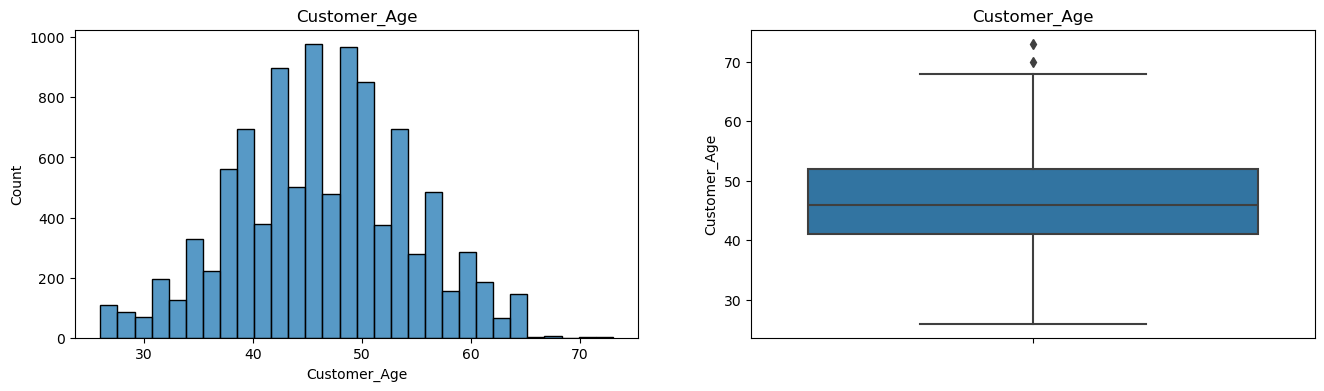

Kolom Customer_Age berditribusi normal
Skewness  : -0.033605016317173456
Jumlah Data : 10127
Median: 46.0
Mean: 46.32596030413745
Jumlah Outlier : 1
% Persentase outlier : 9.874592673052237e-07



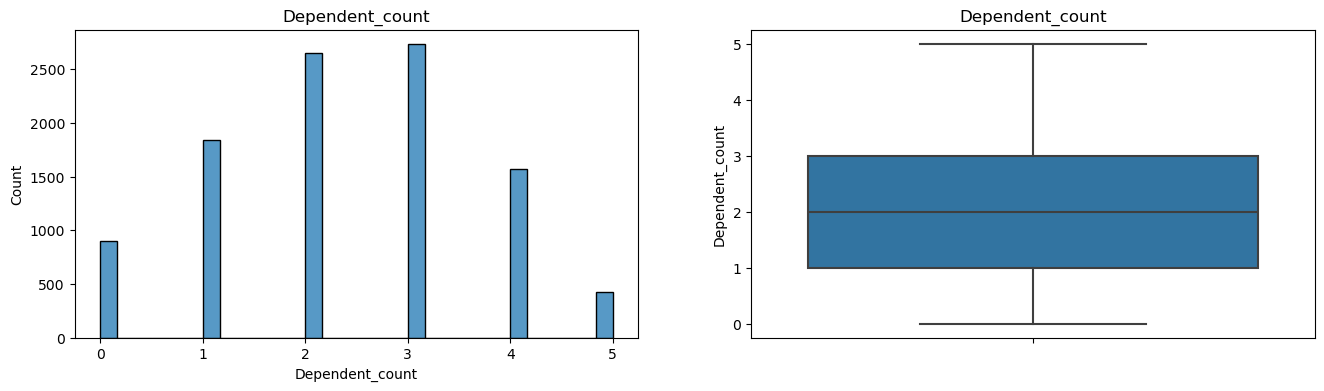

Kolom Dependent_count berditribusi normal
Skewness  : -0.020825535616339912
Jumlah Data : 10127
Median: 2.0
Mean: 2.3462032191172115
Jumlah Outlier : 0
% Persentase outlier : 0.0



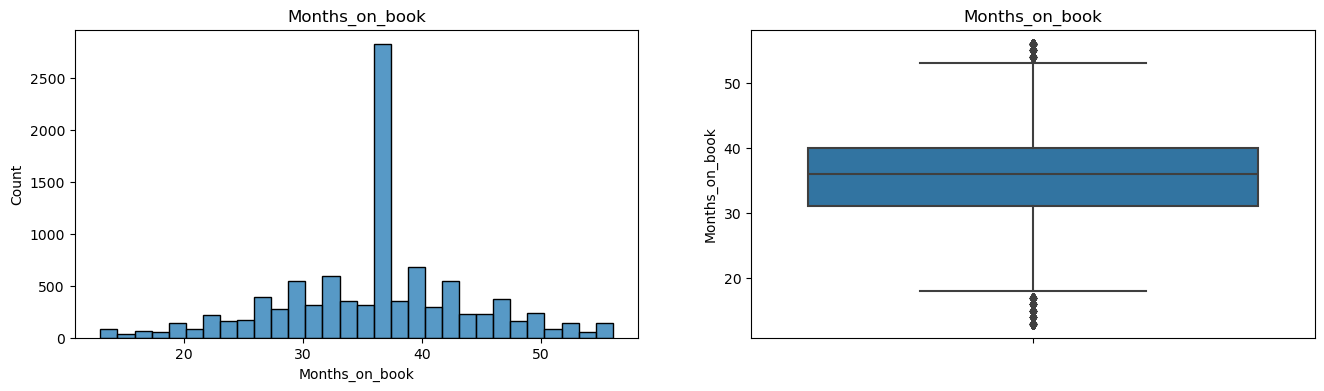

Kolom Months_on_book berditribusi normal
Skewness  : -0.10656535989402989
Jumlah Data : 10127
Median: 36.0
Mean: 35.928409203120374
Jumlah Outlier : 0
% Persentase outlier : 0.0



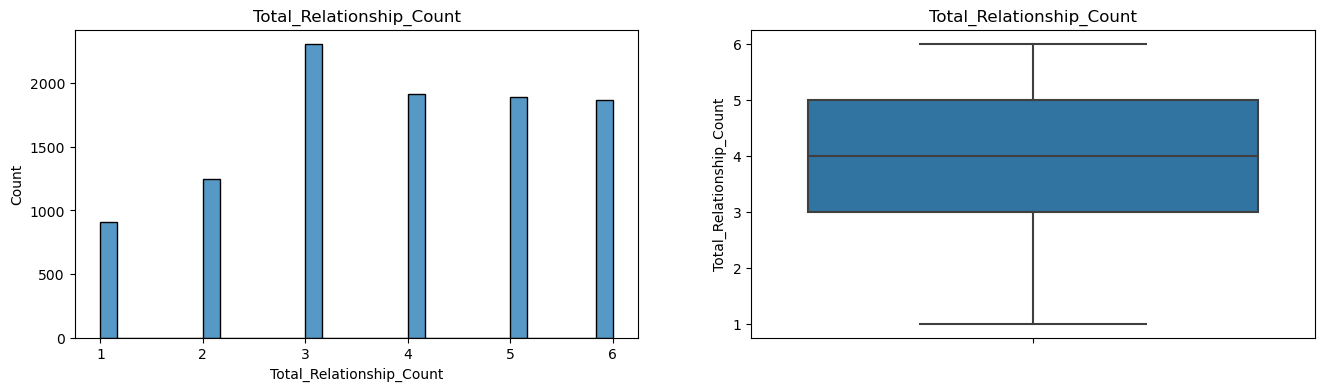

Kolom Total_Relationship_Count berditribusi normal
Skewness  : -0.16245241498173682
Jumlah Data : 10127
Median: 4.0
Mean: 3.8125802310654686
Jumlah Outlier : 0
% Persentase outlier : 0.0



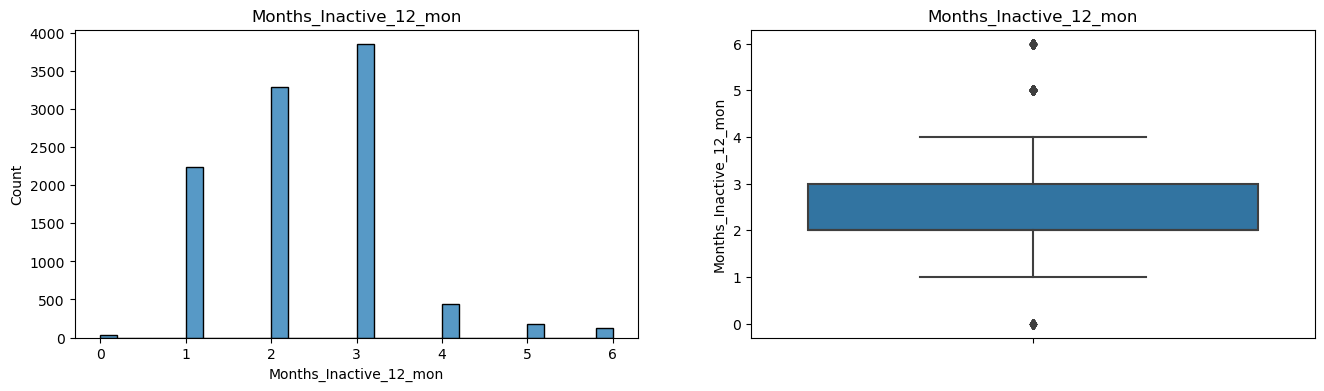

Kolom Months_Inactive_12_mon berditribusi skew
Skewness  : 0.6330611289713137
Jumlah Data : 10127
Median: 2.0
Mean: 2.3411671768539546
Jumlah Outlier : 331
% Persentase outlier : 0.00032684901747802905



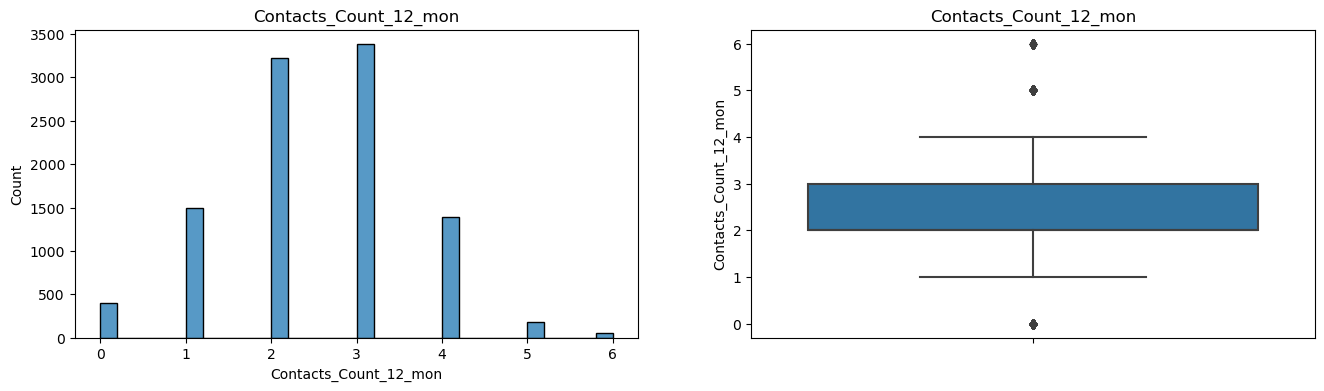

Kolom Contacts_Count_12_mon berditribusi normal
Skewness  : 0.011005626218976492
Jumlah Data : 10127
Median: 2.0
Mean: 2.4553174681544387
Jumlah Outlier : 54
% Persentase outlier : 5.332280043448208e-05



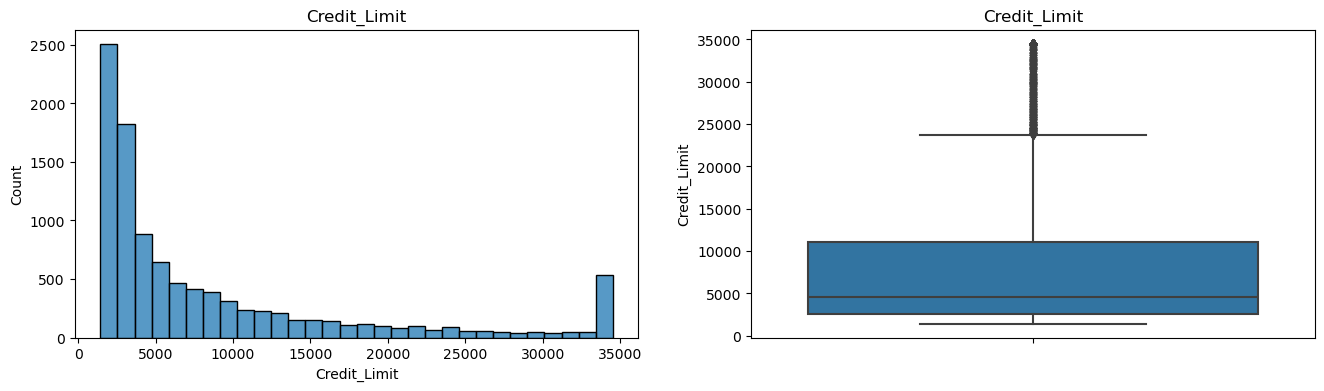

Kolom Credit_Limit berditribusi skew
Skewness  : 1.666725807993647
Jumlah Data : 10127
Median: 4549.0
Mean: 8631.953698034955
Jumlah Outlier : 984
% Persentase outlier : 0.0009716599190283401



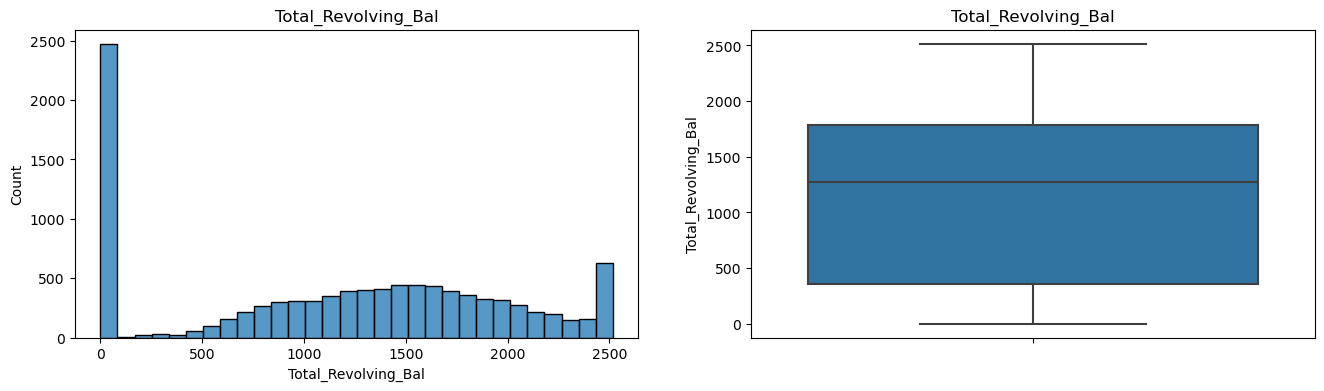

Kolom Total_Revolving_Bal berditribusi normal
Skewness  : -0.14883725028007228
Jumlah Data : 10127
Median: 1276.0
Mean: 1162.8140614199665
Jumlah Outlier : 0
% Persentase outlier : 0.0



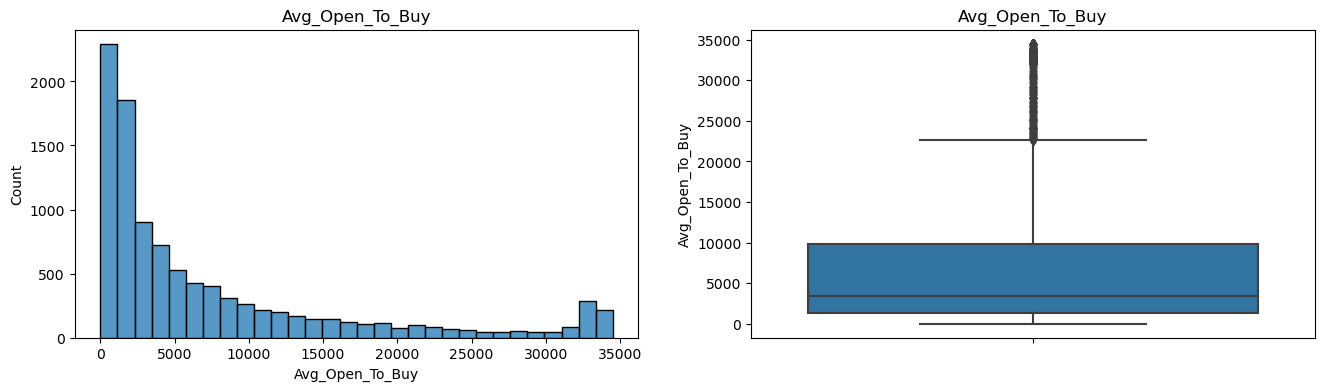

Kolom Avg_Open_To_Buy berditribusi skew
Skewness  : 1.6616965459311595
Jumlah Data : 10127
Median: 3474.0
Mean: 7469.139636614989
Jumlah Outlier : 963
% Persentase outlier : 0.0009509232744149303



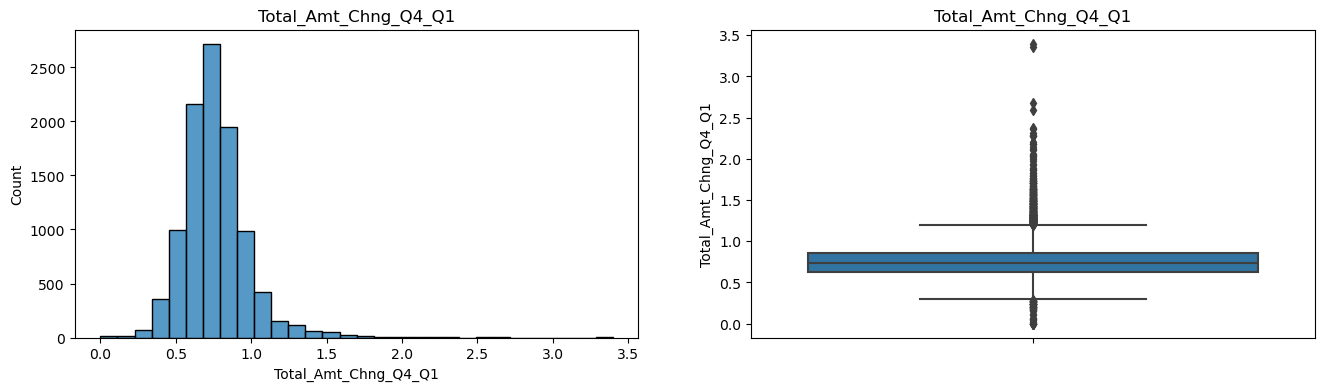

Kolom Total_Amt_Chng_Q4_Q1 berditribusi skew
Skewness  : 1.7320634114286038
Jumlah Data : 10127
Median: 0.736
Mean: 0.7599406536980349
Jumlah Outlier : 396
% Persentase outlier : 0.00039103386985286855



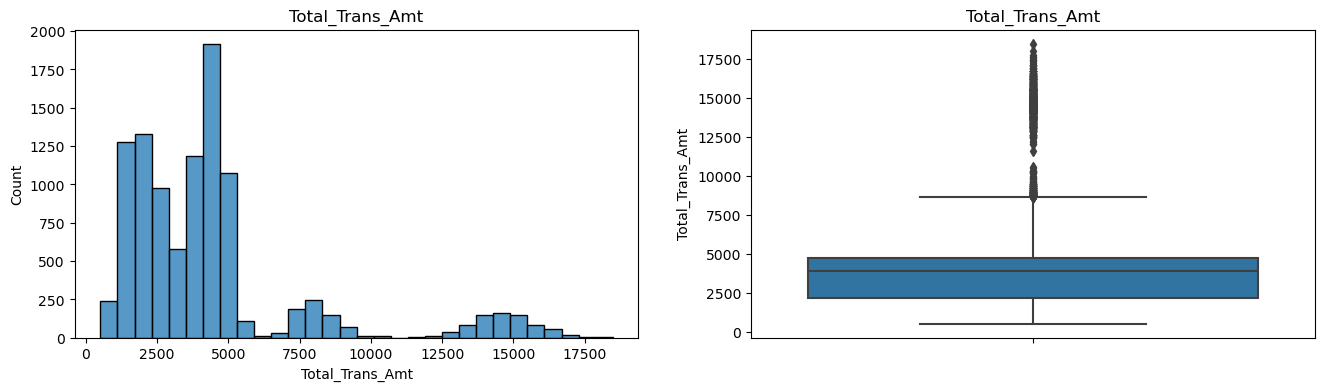

Kolom Total_Trans_Amt berditribusi skew
Skewness  : 2.0410034025756936
Jumlah Data : 10127
Median: 3899.0
Mean: 4404.086303939963
Jumlah Outlier : 896
% Persentase outlier : 0.0008847635035054804



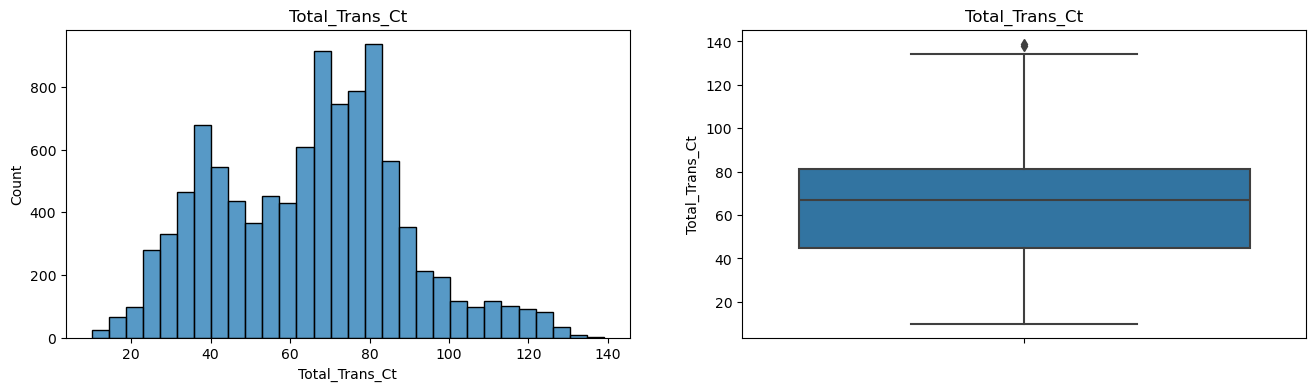

Kolom Total_Trans_Ct berditribusi normal
Skewness  : 0.15367306849872275
Jumlah Data : 10127
Median: 67.0
Mean: 64.85869457884863
Jumlah Outlier : 2
% Persentase outlier : 1.9749185346104474e-06



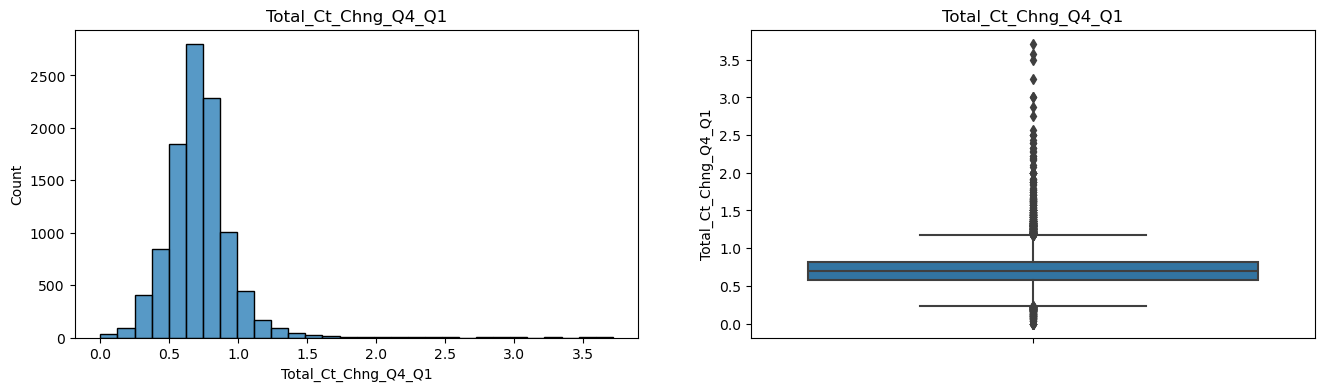

Kolom Total_Ct_Chng_Q4_Q1 berditribusi skew
Skewness  : 2.0640305679077477
Jumlah Data : 10127
Median: 0.702
Mean: 0.7122223758269972
Jumlah Outlier : 394
% Persentase outlier : 0.0003890589513182581



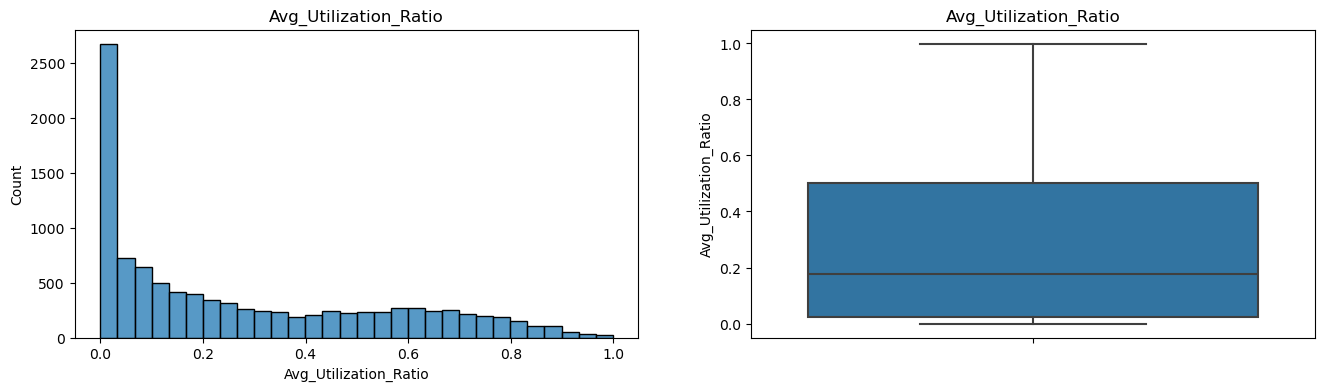

Kolom Avg_Utilization_Ratio berditribusi skew
Skewness  : 0.7180079967731994
Jumlah Data : 10127
Median: 0.176
Mean: 0.2748935518909845
Jumlah Outlier : 0
% Persentase outlier : 0.0

Variables berdistribusi normal :['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct']
Variables berdistribusi normal dengan outlier :['Customer_Age', 'Contacts_Count_12_mon', 'Total_Trans_Ct']

Variables berdistribusi skew :['Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Variables berdistribusi skew dengan outlier :['Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']



In [360]:
data_dist(df,num_col)

>Terlihat kolom 'Dependent_count', 'Total_Relationship_Count' 'Months_Inactive_12_mon', dan 'Contacts_Count_12_mon' bertipe data diskrit dan memiliki rentang nilai yang kecil. Dilihat dari hal tersebut dan informasi keterangan kolom yang ada, kemungkinan besar keempat kolom tersebut merupakan kolom kategorik yang telah diubah menjadi numerik bertipe data integer. Sehingga pada tahap feature engineering, tipe data kolom-kolom tersebut akan diubah menjadi 'object' dan akan dianggap sebagai data kategorik.

> Dari hasil diatas dapat kita simpulkan :
> - Kolom berdistribusi normal : 'Customer_Age', 'Months_on_book', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', dan 'Total_Trans_Ct'.
> - Kolom berdistribusi skew : 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', dan 'Avg_Utilization_Ratio'.  


##### Categorical Feature

In [361]:
# Fungsi untuk menampilkan barchart dari kolom kategorik serta menampilkan informasi jumlah data dan proporsi nilai unik
def diagnostic_plots_categoric(df, variabel):
    fig, axes = plt.subplots(figsize=(12, 4))

    sns.countplot(data=df, x=variabel, palette='Set1')
    axes.set_title(f'Distribution of {variabel}')
    axes.set_xlabel(variabel)
    axes.set_ylabel('Count')


    plt.xticks(rotation=45)
    plt.tight_layout()

    count = df[variabel].value_counts()
    percent = 100*df[variabel].value_counts(normalize=True)
    df_count_percent = pd.DataFrame({'jumlah data':count, 'persentase':percent.round(1)})

    print(df_count_percent)

    plt.show()


                   jumlah data  persentase
Attrition_Flag                            
Existing Customer         8500        83.9
Attrited Customer         1627        16.1


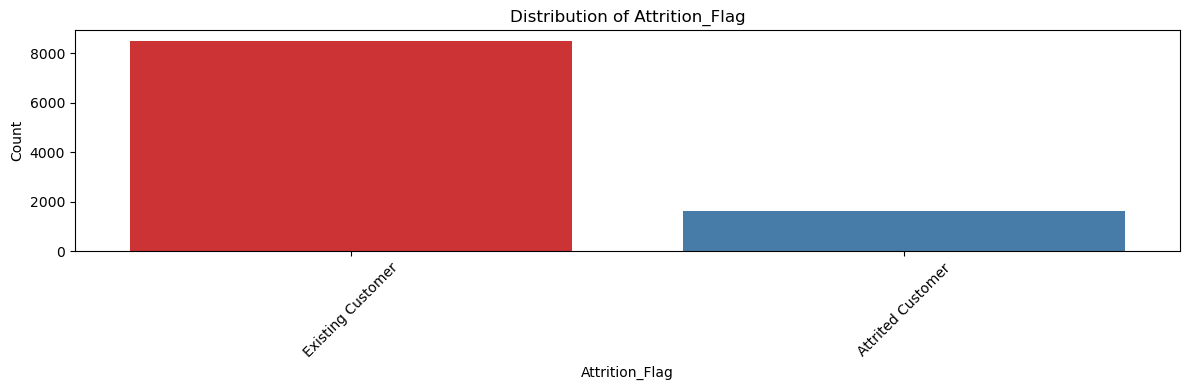

        jumlah data  persentase
Gender                         
F              5358        52.9
M              4769        47.1


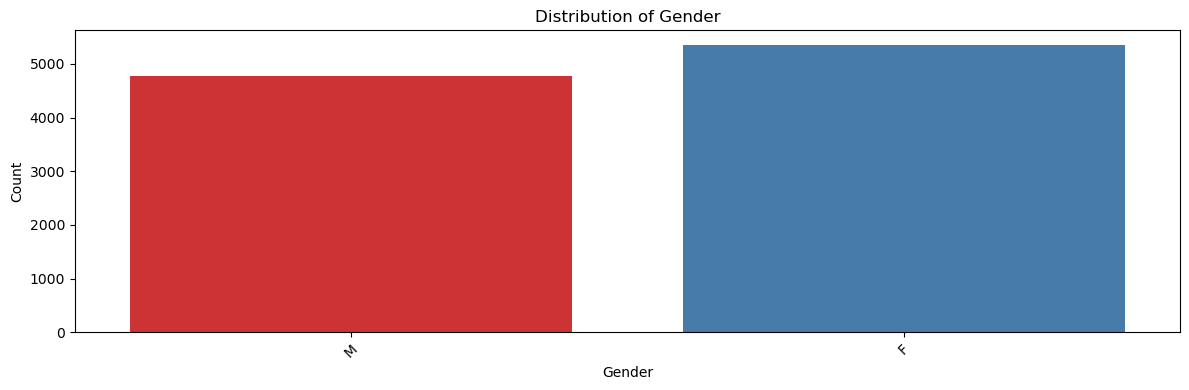

                 jumlah data  persentase
Education_Level                         
Graduate                3128        30.9
High School             2013        19.9
Unknown                 1519        15.0
Uneducated              1487        14.7
College                 1013        10.0
Post-Graduate            516         5.1
Doctorate                451         4.5


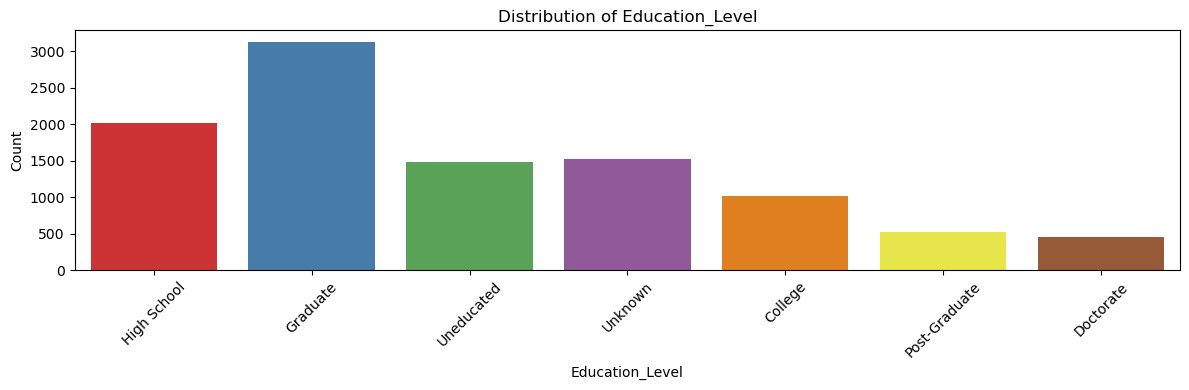

                jumlah data  persentase
Marital_Status                         
Married                4687        46.3
Single                 3943        38.9
Unknown                 749         7.4
Divorced                748         7.4


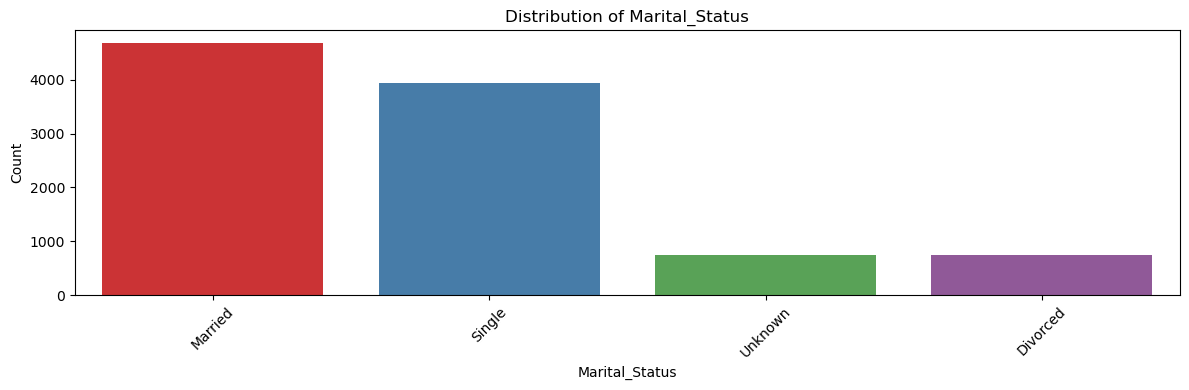

                 jumlah data  persentase
Income_Category                         
Less than $40K          3561        35.2
$40K - $60K             1790        17.7
$80K - $120K            1535        15.2
$60K - $80K             1402        13.8
Unknown                 1112        11.0
$120K +                  727         7.2


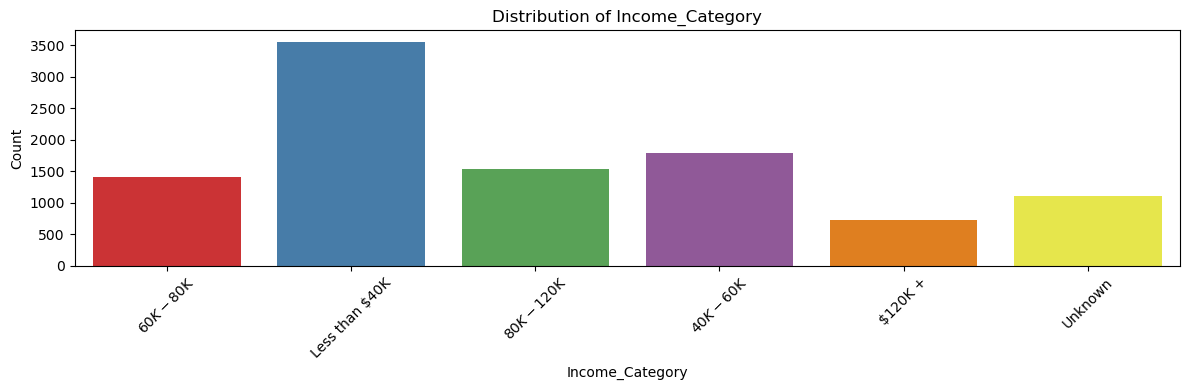

               jumlah data  persentase
Card_Category                         
Blue                  9436        93.2
Silver                 555         5.5
Gold                   116         1.1
Platinum                20         0.2


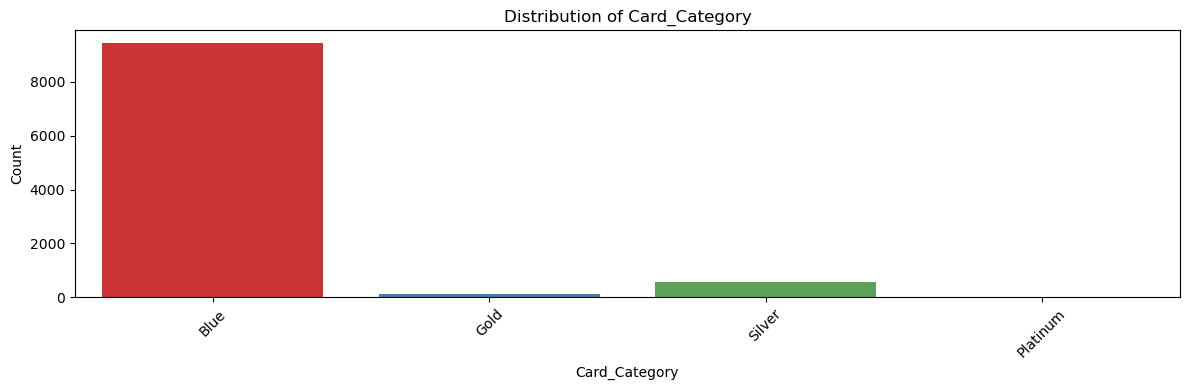

In [362]:
for col in cat_col:
    diagnostic_plots_categoric(df, col)

#### Bivariate Analysis

##### Attrited Customer vs Categorical Feature

In [363]:
# Membuat fungsi untuk menampilkan plot attrited customer dengan variabel categoricalmn nb
def bivariate_cat_plot(df, col):
    grouped_data = df.groupby(['Attrition_Flag', col]).size().reset_index(name='count')

    plt.xticks(rotation=45)

    sns.barplot(x=col, y='count', hue='Attrition_Flag', data=grouped_data)
    plt.show()

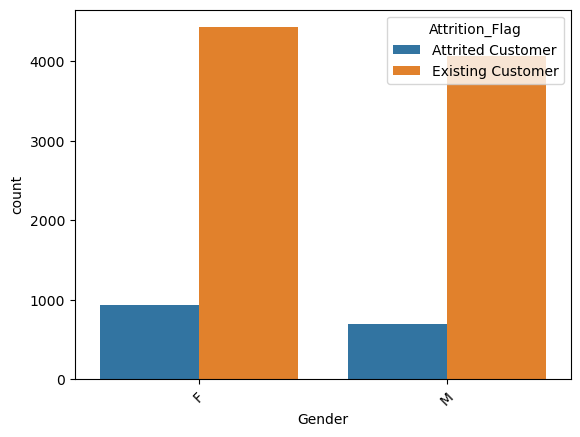

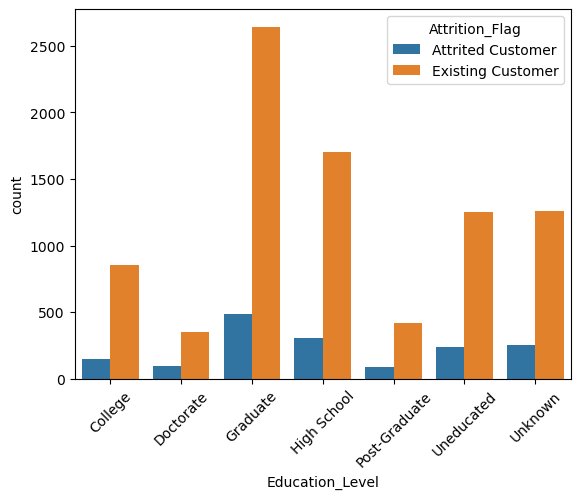

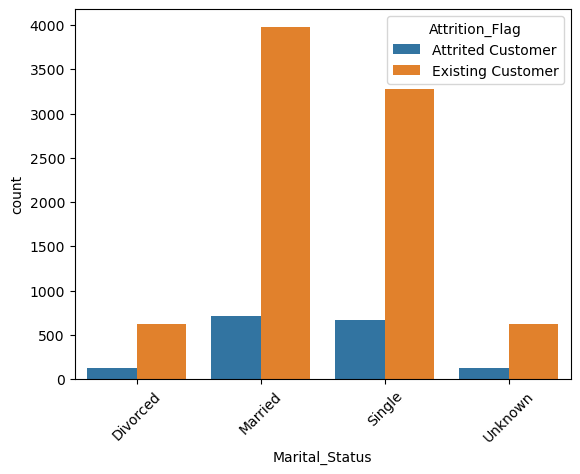

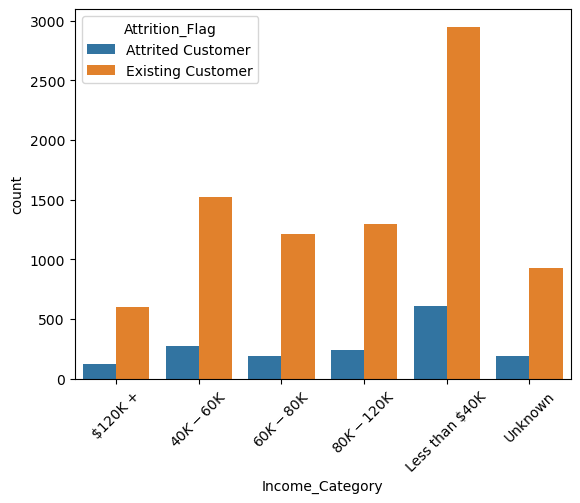

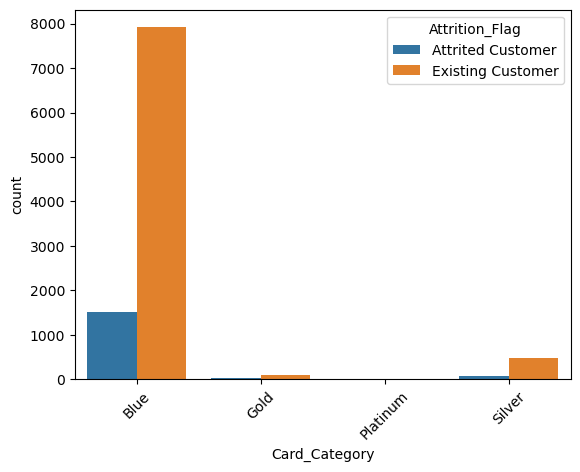

In [364]:
cat_col.remove('Attrition_Flag')

for col in cat_col:
    bivariate_cat_plot(df, col)

##### Attrited Customer vs Numerical Feature

In [365]:
def dens_plot(col):
    # List of customer type
    customers = ['Existing Customer', 'Attrited Customer']

    # Iterate through the risk levels
    for customer in customers:
        # Subset the DataFrame for the current risk level
        subset = df[df['Attrition_Flag'] == customer]

        # Plot the kernel density for the 'HeartRate' feature
        sns.distplot(subset[col], hist=False, kde=True,
                    kde_kws={'shade': True, 'linewidth': 3},
                    label=customer)

    # Add labels and legend
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Density Plot of {col} for Customers Type')
    plt.legend()

    # Show the plot
    plt.show()

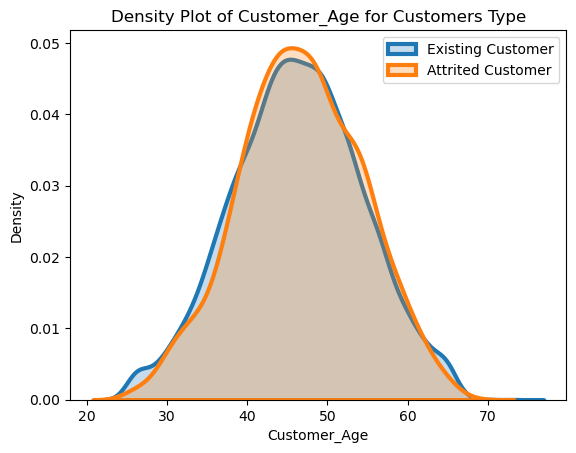

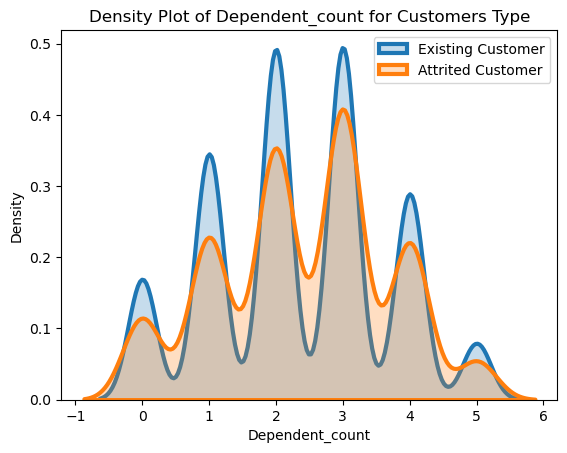

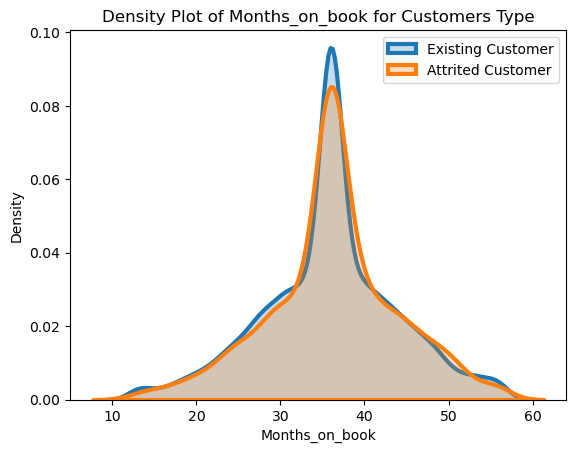

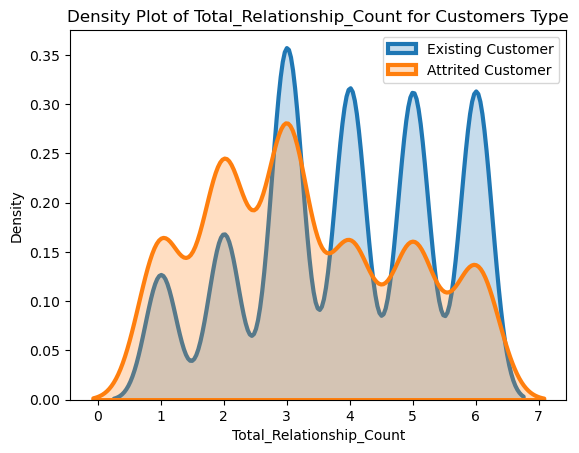

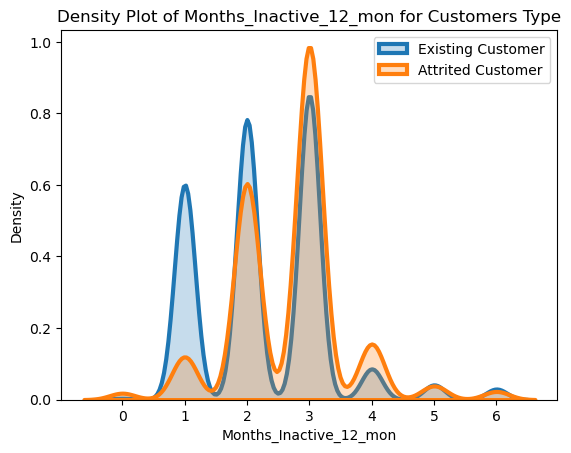

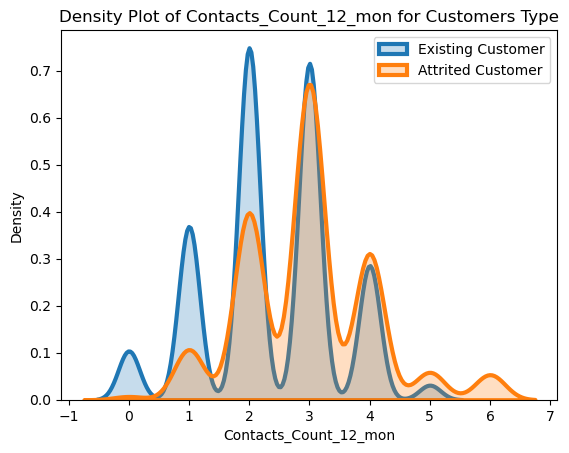

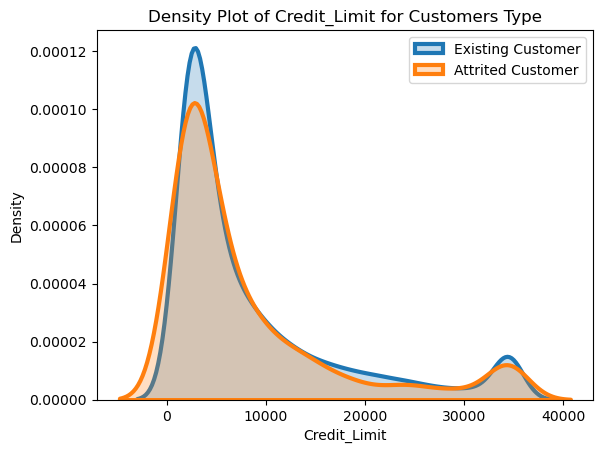

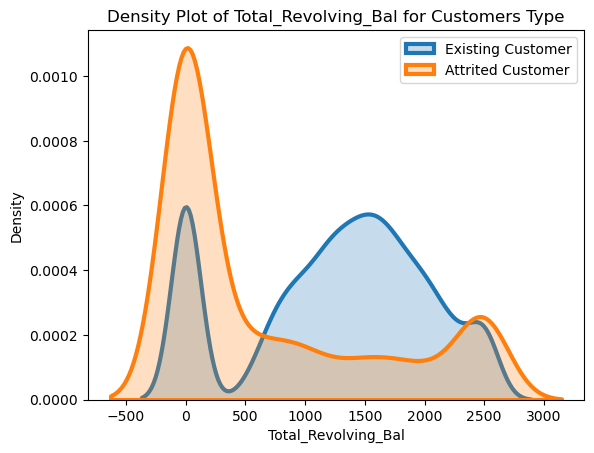

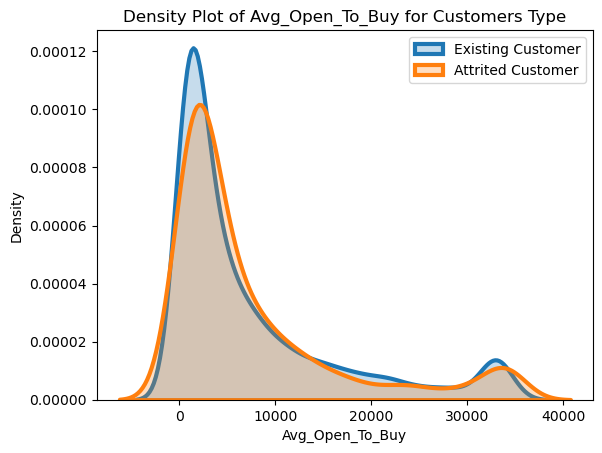

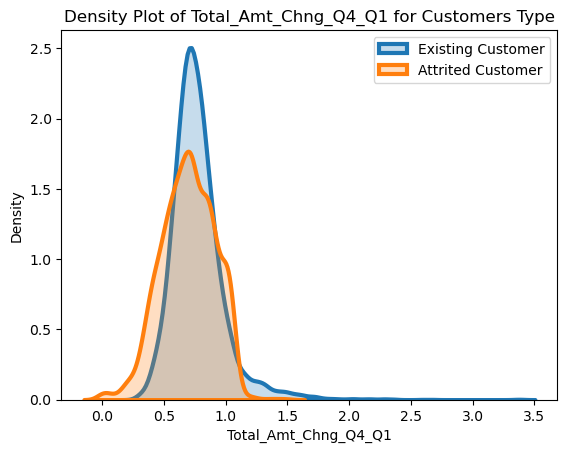

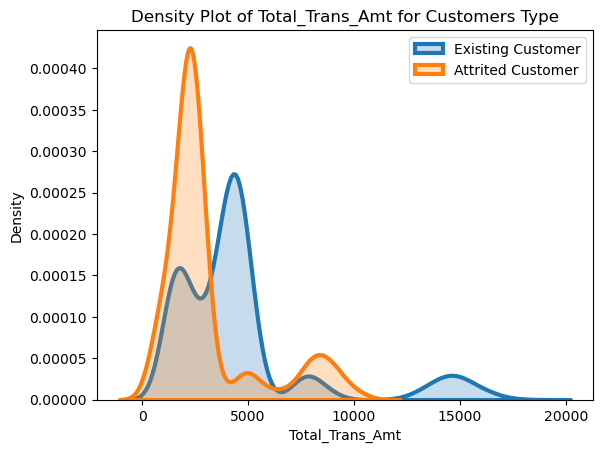

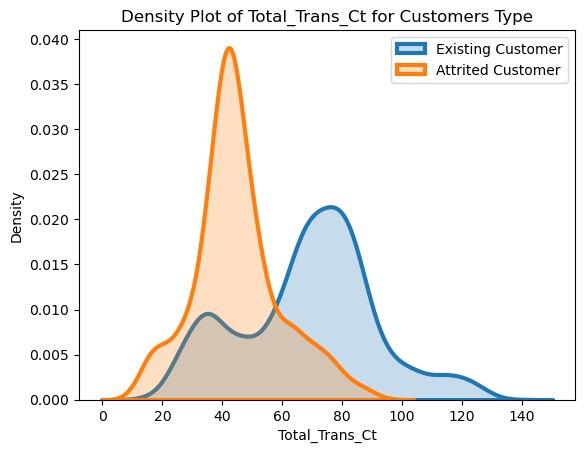

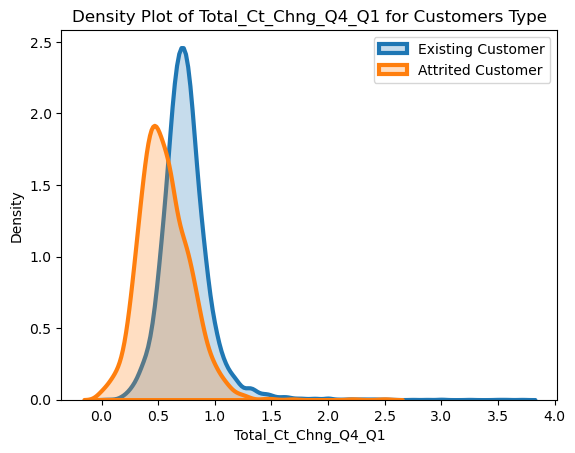

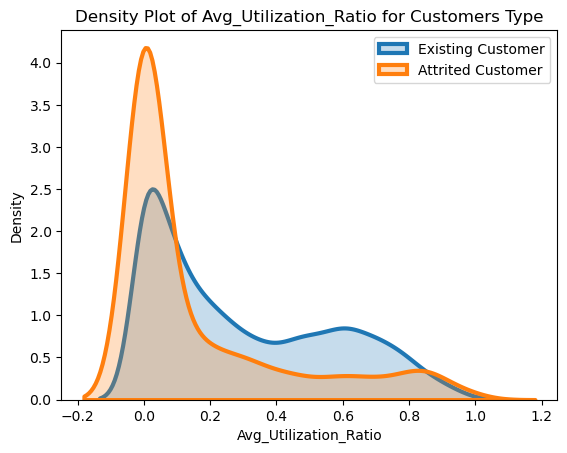

In [366]:
for col in num_col:
    dens_plot(col)

## Data Preparation

Pada tahap EDA diketahui bahwa terdapat kolom yang merupakan data kategorik namun telah diubah menjadi data numerik, sehingga kolom tersebut akan diubah tipe datanya dan dianggap sebagai data kategorik

In [367]:
# Mengubah tipe data menjadi 'object'
df[['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']] = df[['Dependent_count', 
                                                                                                             'Total_Relationship_Count', 
                                                                                                             'Months_Inactive_12_mon',
                                                                                                               'Contacts_Count_12_mon']].astype('object')

Mengubah variabel target menjadi 0 = 'Existing Customer' dan 1 = 'Attrited Customer'

In [368]:
# Drop duplicates data
df.drop_duplicates()

# Change the label on the target variable to numeric
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},inplace=True)

### Split Dataset

In [369]:
# Membagi dataset menjadi data train dan data test
X = df.drop(['Attrition_Flag'], axis=1)
y = df[['Attrition_Flag']]

# Membagi data train dan data test dengan proporsi 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)


X_Train size :  (8101, 19)
X_Test size  :  (2026, 19)


### Feature Selection
Variabel fitur yang digunakan pada pembuatan model ini adalah bertipe numerik dan kategorik sehingga untuk data bertipe numerik akan dilakukan pemilihan fitur dengan metode Kendall Tau sedangkan untuk data bertipe kategorik akan digunakan metode Chi-Squared

#### Feature Selection: Numerical Variable
Kendall Tau adalah metode statistik non-parametrik yang digunakan untuk mengukur derajat korelasi antara variabel fitur bertipe numerik dengan variabel target bertipe kategorik. Kelebihan dari metode ini adalah:
- Tidak memerlukan asumsi tentang distribusi data
- Robust terhadap outlier

In [370]:
# Melakukan pemilihan feature dengan pengecekan korelasi antara data numerik dan variabel target menggunakan metode Kendall Tau
for col in X_train.select_dtypes(exclude='object').columns.tolist():
    corr_rho, pval_s = kendalltau(y_train, X_train[col])
    if pval_s < 0.05:
        print(f"rho-correlation {col} column: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation Credit_Limit column: -0.04, p-value: 1.1980191840379806e-05
rho-correlation Total_Revolving_Bal column: -0.20, p-value: 2.4233841107653187e-101
rho-correlation Avg_Open_To_Buy column: 0.02, p-value: 0.00949954141351888
rho-correlation Total_Amt_Chng_Q4_Q1 column: -0.08, p-value: 1.521686286069535e-19
rho-correlation Total_Trans_Amt column: -0.18, p-value: 1.0349552247616116e-88
rho-correlation Total_Trans_Ct column: -0.31, p-value: 7.852142530673678e-251
rho-correlation Total_Ct_Chng_Q4_Q1 column: -0.26, p-value: 8.614968427221283e-181
rho-correlation Avg_Utilization_Ratio column: -0.20, p-value: 2.1918182312718838e-104


#### Feature Selection: Categoric Variable
Chi-square test adalah metode statistik yang digunakan untuk menguji hubungan antara dua variabel kategorikal. Kelebihan dari metode ini adalah:
- Tidak ada asumsi distribusi tertentu yang harus dipenuhi oleh data. 
- Dapat memberikan hasil yang signifikan dengan sampel yang relatif kecil.

In [371]:
# Melakukan pemilihan feature dengan pengecekan korelasi antara data kategorik dan variabel target menggunakan metode ChiSquare
for col in X_train.select_dtypes(include=['object']).columns.tolist():
    contingency_table = pd.crosstab(y_train['Attrition_Flag'],X_train[col])
    res = chi2_contingency(contingency_table)
    if res.pvalue < 0.05:
        print(f"P-value {col}: {res.pvalue}")

P-value Gender: 0.0005293820853976861
P-value Dependent_count: 0.024136534395545427
P-value Education_Level: 0.03967205580577539
P-value Marital_Status: 0.03698688481535528
P-value Income_Category: 0.032554035505723694
P-value Total_Relationship_Count: 3.219148695423943e-41
P-value Months_Inactive_12_mon: 3.5029353911576505e-65
P-value Contacts_Count_12_mon: 3.629202172015478e-89


In [372]:
# Kolom/variabel baru hasil feature selection
new_col = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category']

X_train = X_train[new_col]
X_test = X_test[new_col]

### Handling Outlier
Outlier adalah data dengan nilai yang signifikan berbeda dari mayoritas sebaran data. Dari hasil EDA, diketahui bahwa outlier terdapat pada kedua sebaran yakni sebaran normal dan skew sehingga akan dilakukan penangan outlier sesuai dengan distribusi tersebut.

Metode Winsorizer merupakan teknik statistik untuk menangani atau mengurangi outlier dari sebaran data. metode tersebut bekerja dengan mengubah nilai outlier menjadi nilai maksimum dan minimum dari sebaran.

#### Normal Distribution

In [373]:
# Melakukan penanganan outlier normal distribution dengan metode Winsorizer capping method 'gaussian'
norm_dist = []
for col in X_train.select_dtypes(exclude='object').columns.tolist():
    if X_train[col].skew() < 0.5 and X_train[col].skew() > -0.5:
        norm_dist.append(col)

winsoriser = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=norm_dist)

X_train[norm_dist] = winsoriser.fit_transform(X_train[norm_dist])

#### Skew Distribution

In [374]:
# Melakukan penanganan outlier skew distribution dengan metode Winsorizer capping method 'iqr'
skew_dist = []
for col in X_train.select_dtypes(exclude=['object']).columns.tolist():
    if X_train[col].skew() > 0.5 or X_train[col].skew() < -0.5:
        skew_dist.append(col)

winsoriser = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=skew_dist)

X_train[skew_dist] = winsoriser.fit_transform(X_train[skew_dist])

### Handling Missing Value

In [375]:
# Cek missing value pada X_train
if X_train.columns[X_train.isna().any()].tolist():
    print("Kolom X_train terdapat missing values:")
    for col in X_train.columns[X_train.isna().any()].tolist():
        print(f'{col} : {X_train[col].isna().sum()}')
else:
    print("Tidak ada kolom pada X_train dengan missing value")

# Cek missing value pada X_test
if X_test.columns[X_test.isna().any()].tolist():
    print("Kolom X_test terdapat missing values:")
    for col in X_test.columns[X_test.isna().any()].tolist():
        print(f'{col} : {X_test[col].isna().sum()}')
else:
    print("Tidak ada kolom pada X_test dengan missing value")

# Cek missing value pada y_train
if y_train.columns[y_train.isna().any()].tolist():
    print(f'Jumlah missing value pada y_train: {y_train.isna().sum()}')
else:
    print("Tidak ada missing value pada y_train")

# Cek missing value pada y_test
if y_test.columns[y_test.isna().any()].tolist():
    print(f'Jumlah missing value pada y_test: {y_test.isna().sum()}')
else:
    print("Tidak ada missing value pada y_train")


Tidak ada kolom pada X_train dengan missing value
Tidak ada kolom pada X_test dengan missing value
Tidak ada missing value pada y_train
Tidak ada missing value pada y_train


### Feature Scaling
Feature Scaling adalah proses merubah nilai fitur pada data yang digunakan sehingga memiliki skala yang sama.

In [376]:
skew_dist = []
for col in X_train.select_dtypes(exclude=['object']).columns.tolist():
    if X_train[col].skew() > 0.5 or X_train[col].skew() < -0.5:
        skew_dist.append(col)
        
norm_dist = []
for col in X_train.select_dtypes(exclude=['object']).columns.tolist():
    if X_train[col].skew() < 0.5 and X_train[col].skew() > -0.5:
        norm_dist.append(col)

print(skew_dist)
print(norm_dist)

['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
['Total_Revolving_Bal', 'Total_Trans_Ct']


##### Feature Scaling : Skew Distribution
Metode Minmax scaler digunakan untuk scaling data numerik dengan sebaran skew karena metode ini melakukan perhitungan dengan menggunakan nilai minimum dan maksimum (bukan mean dan media) sehingga metode ini baik digunakan untuk data yang tidak berdistribusi normal.

In [377]:
# Scaling feature data numerik berdistribusi skew
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train[skew_dist])


X_train_mm_scaler = pd.DataFrame(mm_scaler.transform(X_train[skew_dist]),columns=skew_dist)
X_test_mm_scaler = pd.DataFrame(mm_scaler.transform(X_test[skew_dist]),columns=skew_dist)

##### Feature Scaling : Normal Distribution
Metode Standard scaler digunakan untuk scaling data numerik dengan sebaran normal karena metode ini melakukan perubahan data sehingga memiliki mean 0 dan standard deviasi 1.

In [378]:
# Scaling feature data numerik berdistribusi normal
s_scaler = StandardScaler()
s_scaler.fit(X_train[norm_dist])

X_train_s_scaler = pd.DataFrame(s_scaler.transform(X_train[norm_dist]),columns=norm_dist)
X_test_s_scaler = pd.DataFrame(s_scaler.transform(X_test[norm_dist]),columns=norm_dist)

In [379]:
# Reset indeks data Standart Scaler
X_train_mm_scaler.reset_index(drop= True)
X_test_mm_scaler.reset_index(drop= True)
X_train_s_scaler.reset_index(drop= True)
X_test_s_scaler.reset_index(drop= True);

### Feature Encoding
Tahap encoding adalah tahap merubah data pada variabel kategorik menjadi bentuk yang dapat dimengerti oleh algoritma pembelajaran mesin.

In [380]:
cat_col_nom = ['Gender']
cat_col_ord = ['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Education_Level',
 'Marital_Status',
 'Income_Category']

#### One-Hot Encoding
One-Hot Encoding adalah metode encoding yang merubah data kategorik nominal menjadi vektor biner dengan nilai 0 dan 1.

In [381]:
# Encoding data nominal
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[cat_col_nom])

X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat_col_nom]), columns=ohe.get_feature_names_out(cat_col_nom))
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_col_nom]), columns=ohe.get_feature_names_out(cat_col_nom))

In [382]:
# Reset indeks data One Hot Encoding
X_train_ohe.reset_index(drop= True)
X_test_ohe.reset_index(drop= True);

#### Ordinal Encoding
Ordinal Encoding digunakan untuk mengubah variabel kategorik ordinal menjadi numerik berdasarkan urutan atau peringkat.

In [383]:
# Encoding data ordinal
or_en = OrdinalEncoder()
or_en.fit(X_train[cat_col_ord])

X_train_or_en = pd.DataFrame(or_en.fit_transform(X_train[cat_col_ord]), columns=cat_col_ord)
X_test_or_en= pd.DataFrame(or_en.transform(X_test[cat_col_ord]), columns=cat_col_ord)

In [384]:
# Reset indeks data Ordinal Encoding
X_train_or_en.reset_index(drop= True)
X_test_or_en.reset_index(drop= True);

In [385]:
# Menggabungkan data hasil scaler dan encoding
X_train = pd.concat([X_train_mm_scaler,X_train_s_scaler,X_train_ohe,X_train_or_en], axis=1)
X_test = pd.concat([X_test_mm_scaler,X_test_s_scaler,X_test_ohe,X_test_or_en], axis=1)

#### Label Encoding
Label encoding adalah proses mengubah variabel target bertipe kategorik menjadi numerik. Setiap kelas unik pada variabel target diubah menjadi angka unik bertipe integer.

In [386]:
# Encoding variabel target
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = pd.DataFrame(label_encoder.transform(y_train), columns=['Attrition_Flag'])
y_test = pd.DataFrame(label_encoder.transform(y_test), columns=['Attrition_Flag'])

## Modeling

### Model Training: SVM

In [387]:
# Hyperparameter tuning model SVM
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'kernel': 'poly'}


In [388]:
# Training model SVC dengan nilai parameter terbaik
svm = SVC(C = 10, kernel = 'poly', random_state=11)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly', random_state=11)

### Modeling: Random Forest


In [389]:
# Hyperparameter tuning model Random Forest
rf_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}


In [390]:
# Training model Random Forest dengan menggunakan nilai parameter terbaik
rf_clf = RandomForestClassifier(criterion = 'gini', max_depth = 20, max_features = 'sqrt', n_estimators = 300, random_state=11)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=11)

### Modeling: XGBoost


In [391]:
# Hyperparameter tuning model XGBoost
xgb_clf = xgboost.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [392]:
# Training model Random Forest dengan menggunakan nilai parameter terbaik
xgb_clf = xgboost.XGBClassifier(learning_rate = 0.1, max_depth = 4, n_estimators= 300, random_state=11)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

## Model Evaluation

### Model Evaluation: SVM

SVM Train : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7023
           1       0.74      0.89      0.80      1078

    accuracy                           0.94      8101
   macro avg       0.86      0.92      0.89      8101
weighted avg       0.95      0.94      0.94      8101



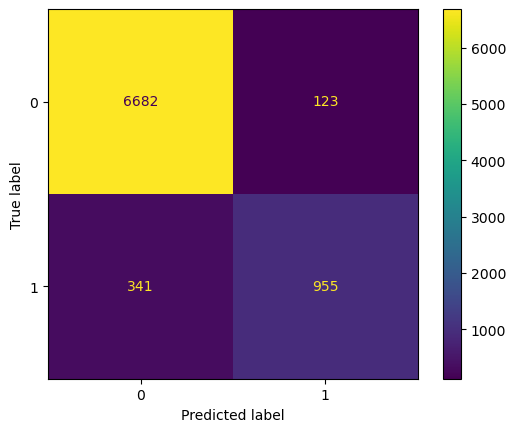

SVM Test  : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1736
           1       0.72      0.82      0.76       290

    accuracy                           0.93      2026
   macro avg       0.84      0.88      0.86      2026
weighted avg       0.93      0.93      0.93      2026



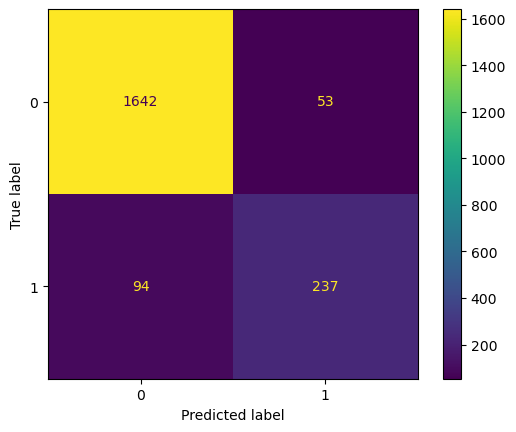

In [393]:
# Evaluasi model SVM
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

print('SVM Train : ')
print(classification_report(y_pred_train_svm, y_train))

# Confusin matriks data train model SVM
cm = confusion_matrix(y_train, y_pred_train_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.show()

print('SVM Test  : ')
print(classification_report(y_pred_test_svm, y_test))

# Confusin matriks data test model SVM
cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.show()


### Model Evaluation: Random Forest

Random Forest Train : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



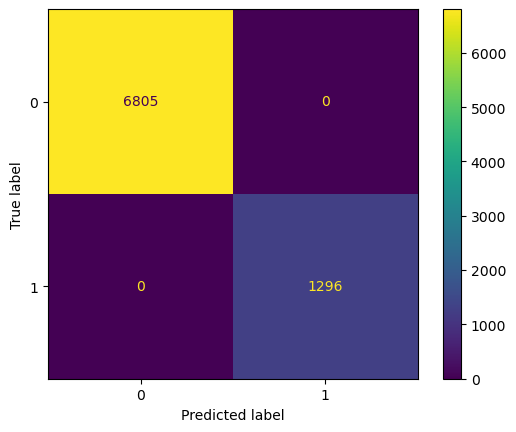

Random Forest Test  : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1726
           1       0.83      0.92      0.87       300

    accuracy                           0.96      2026
   macro avg       0.91      0.94      0.92      2026
weighted avg       0.96      0.96      0.96      2026



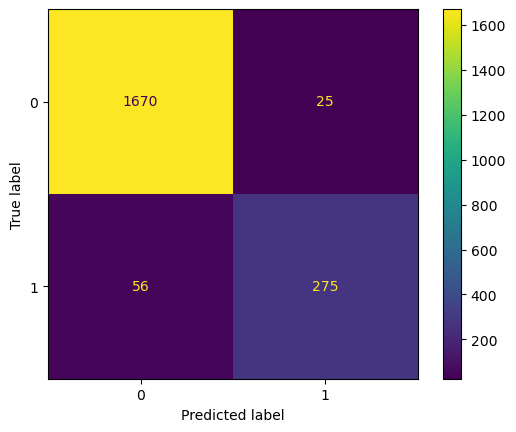

In [394]:
# Evaluasi model Random Forest
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

print('Random Forest Train : ')
print(classification_report(y_pred_train_rf, y_train))

# Confusin matriks data train model Random Forest
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_clf.classes_)
disp.plot()
plt.show()

print('Random Forest Test  : ')
print(classification_report(y_pred_test_rf, y_test))

# Confusin matriks data test model Random Forest
cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_clf.classes_)
disp.plot()
plt.show()

### Model Evaluation: XGBoost

XGBoost Train : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6815
           1       0.98      0.99      0.98      1286

    accuracy                           0.99      8101
   macro avg       0.99      0.99      0.99      8101
weighted avg       0.99      0.99      0.99      8101



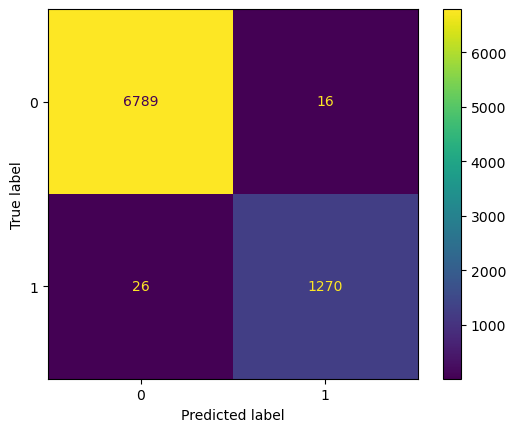

XGBoost Test  : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1706
           1       0.89      0.92      0.90       320

    accuracy                           0.97      2026
   macro avg       0.93      0.95      0.94      2026
weighted avg       0.97      0.97      0.97      2026



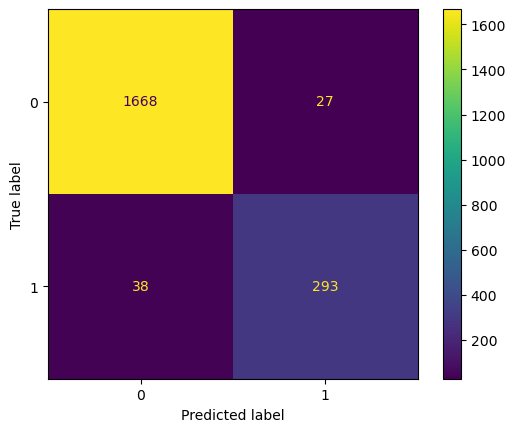

In [395]:
# Evaluasi model XGBoost
y_pred_train_xgb = xgb_clf.predict(X_train)
y_pred_test_xgb = xgb_clf.predict(X_test)

print('XGBoost Train : ')
print(classification_report(y_pred_train_xgb, y_train))

# Confusin matriks data train model XGBoost
cm = confusion_matrix(y_train, y_pred_train_xgb, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

print('XGBoost Test  : ')
print(classification_report(y_pred_test_xgb, y_test))

# Confusin matriks data test model XGBoost
cm = confusion_matrix(y_test, y_pred_test_xgb, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_clf.classes_)
disp.plot()
plt.show()